# ML@NERSC Survey Analysis

This notebook contains the plotting code for the ML@NERSC survey results.

To get started, download the responses spreadsheet as a tab-separated file (TSV) and put it in this directory.

ML@NERSC 2022 responses: https://docs.google.com/spreadsheets/d/1U6wNudHEaOquwzEF7ePONncIzXBmJpcbDNZoDo3sYtU/edit?usp=sharing

In [96]:
import pandas as pd

import matplotlib.pyplot as plt

In [97]:
def split_multi_response(x):
    """Splits a multiple checkbox answer column into single flattened Series"""
    x = x.dropna()
    return x.apply(lambda x: [s.strip() for s in x.split(',')]).explode()

## Load the data

In [98]:
data = pd.read_csv('ML@NERSC User Survey 2022 (Responses) - Form Responses 1.tsv', sep='\t')

In [99]:
data

,Timestamp,How do you rate your expertise in Machine Learning?,What science domains are you using ML for?,Any publications that you would like to share with us,What frameworks/tools are you using?,What is your preferred environment for ML development?,Where do you run your ML models (include future plans)? [My own laptop or development box],Where do you run your ML models (include future plans)? [NERSC],Where do you run your ML models (include future plans)? [Other HPC center(s)],Where do you run your ML models (include future plans)? [University/Group cluster],...,How well does the ML software stack at NERSC satisfy your needs?,"How satisfied are you with NERSC's ML user support (documentation, help tickets, training events)?","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Installing/using software]","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Application performance]","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Getting interactive resources for development/testing]","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Submitting jobs]","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Getting jobs through the queues]",Are there any other aspects of running your ML workload at NERSC that you find challenging?,Do you have any other comments or suggestions to improve the suitability of NERSC resources for Machine Learning?,"Email (optional, so we can follow-up with you if relevant)"
0,4/8/2022 17:08:58,5.0,High Energy Physics,NaN,"TensorFlow 1, TensorFlow 2, Keras",IDEs / text editors and scripts,NaN,"Training, Inference",NaN,Inference,...,6.0,7.0,No challenge or concern,Somewhat challenging,Somewhat challenging,No challenge or concern,Highly challenging,NaN,NaN,NaN
1,4/8/2022 17:36:26,5.0,Applied Mathematics,https://arxiv.org/abs/2202.11214,"PyTorch, scikit-learn",IDEs / text editors and scripts,NaN,"Training, Inference",NaN,NaN,...,7.0,7.0,No challenge or concern,Somewhat challenging,No challenge or concern,No challenge or concern,Highly challenging,NaN,NaN,shashanksubramanian@lbl.gov
2,5/9/2022 16:40:25,1.0,Astrophysics,NaN,NaN,NaN,Inference,"Training, Inference",Inference,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5/9/2022 16:55:58,6.0,"Biosciences, Earth and Environmental Science, ...",NaN,"PyTorch, scikit-learn, weka",Notebooks (Jupyter or Colab),"Training, Inference","Training, Inference","Training, Inference",NaN,...,5.0,5.0,Somewhat challenging,Somewhat challenging,Highly challenging,Somewhat challenging,Highly challenging,NaN,NaN,NaN
4,5/10/2022 4:36:49,5.0,"Chemistry, Computer Science, Physics - General",NaN,"TensorFlow 2, PyTorch, JAX",IDEs / text editors and scripts,Training,NaN,Training,NaN,...,6.0,5.0,No challenge or concern,Somewhat challenging,Somewhat challenging,No challenge or concern,Somewhat challenging,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,6/16/2022 9:50:30,3.0,"Astrophysics, Computer Science, High Energy Ph...",NaN,PyTorch,IDEs / text editors and scripts,"Training, Inference","Training, Inference",NaN,NaN,...,3.0,3.0,No challenge or concern,Somewhat challenging,Somewhat challenging,Somewhat challenging,Highly challenging,I'm not sure if ipynb are suitable for nersc j...,NaN,NaN
170,6/16/2022 12:10:07,5.0,Chemistry,DOI: 10.1039/D2CY00284A,scikit-learn,IDEs / text editors and scripts,"Training, Inference",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,6/16/2022 19:32:50,5.0,Materials Science,NaN,"TensorFlow 2, Keras, PyTorch",IDEs / text editors and scripts,"Training, Inference","Tra

## How do you rate your experience in ML?

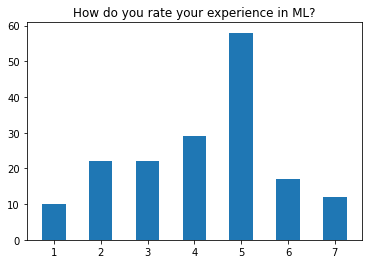

In [100]:
plt.figure()
plt.hist(data.iloc[:,1], bins=13, range=(0.75,7.25))
plt.title('How do you rate your experience in ML?');

## What science domains are you using ML for?

In [107]:
# Select the appropriate column
responses = data.iloc[:,2]

# Split responses
domains = split_multi_response(responses)

# Get unique response counts
domain_counts = domains.value_counts(ascending=True)
domain_counts

I am currently not using ML in my research.     1
Planetary science / space physics               1
Computational Material                          1
Oceanography                                    1
Accelerator physics                             1
Condensed Matter Physics                        1
Renewable Energy                                1
Robotics                                        1
Materials science                               1
TEST                                            1
Materials Science                               6
Fusion Energy Science                           7
Medical                                         8
Geosciences                                    10
Nuclear Physics                                11
Biosciences                                    23
Engineering                                    24
Applied Mathematics                            24
Cosmology                                      24
Earth and Environmental Science                25


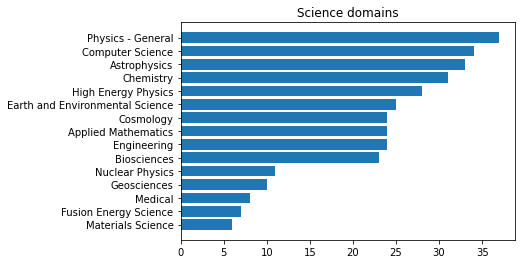

In [108]:
# Throw out rare responses
domain_counts = domain_counts[domain_counts > 1]

# Make the plot
fig, ax = plt.subplots()

ax.barh(domain_counts.index, domain_counts)
ax.set_title('Science domains');

## How does ML fit into your scientific workflow(s)?

In [133]:
data.columns[18]

'How does ML fit into your scientific workflow(s)? (options are illustrative so please mark any that apply and feel free to add your own description, include future plans)'

In [134]:
responses = data.iloc[:,18]

workflows = split_multi_response(responses)

workflow_counts = workflows.value_counts(ascending=True)
workflow_counts

ML for predictive and prescriptive experimentation                   1
Typically it fits in poorly.                                         1
ML for real time in situ data analytics of simulation output         1
Research only                                                        1
Using ML frameworks for faster simulations on GPUs/TPUs              1
i dont know                                                          1
I am currently not using ML in my research                           1
ML for real-time control of scientific instrument                   13
ML for real-time ("online") experimental data                       36
Entire ML replacement of simulation                                 49
Coupled ML+simulation (e.g. replacing DFT in a simulation loop)     79
ML for offline data analysis                                       116
Name: How does ML fit into your scientific workflow(s)? (options are illustrative so please mark any that apply and feel free to add your own descri

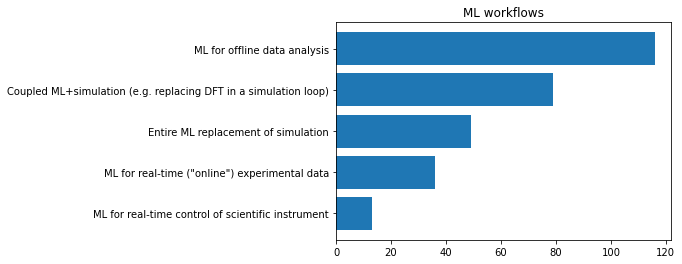

In [135]:
# Filter rare responses
workflow_counts = workflow_counts[workflow_counts > 1]

# Make the plot
fig, ax = plt.subplots()

ax.barh(workflow_counts.index, workflow_counts)
ax.set_title('ML workflows');

## What frameworks/tools are you using?

In [111]:
responses = data.iloc[:,4]
frameworks = split_multi_response(responses)

In [112]:
# Data cleanup, merging
frameworks[frameworks.str.contains('Flux')] = 'Flux'
frameworks[frameworks.str.contains('jax|flax|haiku', case=False)] = 'JAX'
frameworks[frameworks.str.contains('matlab', case=False)] = 'Matlab'

In [113]:
# Get unique response counts
framework_counts = frameworks.value_counts(ascending=True)
framework_counts

dont know yet                                                                                                  1
I'm still learning ML/DL techniques and currently in the process of comparing different Python frameworks.     1
we use some customized codes.                                                                                  1
in-house developed code                                                                                        1
Onnxruntime                                                                                                    1
Ray                                                                                                            1
Megatron                                                                                                       1
RLlib                                                                                                          1
TensorRT                                                                                        

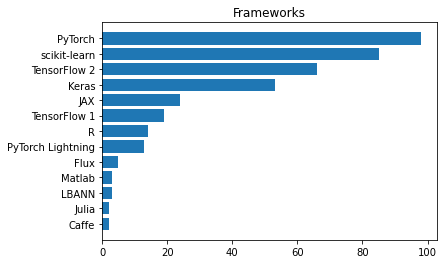

In [114]:
# Filter out rare responses
framework_counts = framework_counts[framework_counts > 1]

# Make the plot
fig, ax = plt.subplots()

ax.barh(framework_counts.index, framework_counts)
ax.set_title('Frameworks');

## What types of ML tasks do you employ?

In [115]:
responses = data.iloc[:,20]
tasks = split_multi_response(responses)
task_counts = tasks.value_counts(ascending=True)
task_counts

dense prediction for scientific data                                                                                                   1
Language Modeling                                                                                                                      1
Have not started yet. Need to learn first step.                                                                                        1
At the moment we use machine learning technology to tease reaction mechanism and kinetics out of time resolved concentration data      1
PINN                                                                                                                                   1
None                                                                                                                                   1
Reinforcement learning                                                                                                                25
Segmentation / object detection          

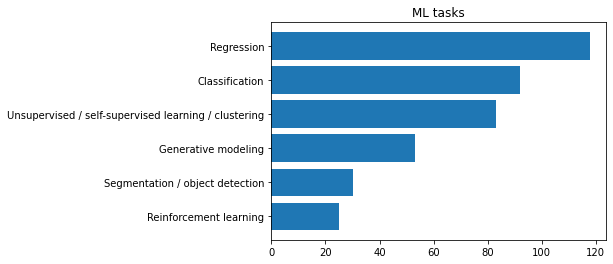

In [116]:
# Filter rare responses
task_counts = task_counts[task_counts > 1]

# Make the plot
fig, ax = plt.subplots()

ax.barh(task_counts.index, task_counts)
ax.set_title('ML tasks');

## What types of models are you using?

In [117]:
responses = data.iloc[:,21]

In [118]:
# Simplify responses before splitting (e.g. to remove commas)
rename_map = {
    'Traditional ML models (SVM, Random Forest, Decision Trees, Ensemble Methods, etc)': 'Traditional ML',
    'Fully-connected / feed-forward Neural Networks (MLPs)': 'Fully-connected Neural Networks',
    'Convolutional Neural Networks (CNNs)': 'Convolutional Neural Networks',
    'Recurrent Neural Networks (RNNs, GRUs, LSTMs)': 'Recurrent Neural Networks',
    'Attention models (e.g. Transformer, BERT, GPT)': 'Transformers',
    'Graph or point-cloud Neural Networks': 'Graph/Point Neural Networks',
}

for k,v in rename_map.items():
    responses = responses.str.replace(k, v, regex=False)

In [119]:
models = split_multi_response(responses)

In [120]:
# Additional response cleanup
models[models.str.contains('flow', case=False)] = 'Flow-based models'
models[models.str.contains('gaussian|gpr', case=False)] = 'Gaussian Processes'

In [121]:
model_counts = models.value_counts(ascending=True)
model_counts

None                                                 1
cGAN                                                 1
Bayesian methods                                     1
Reservoir Methods                                    1
BP                                                   1
Not sure yet                                         1
Variational AE                                       1
Have not started yet. Need to learn first step.      1
Bayesian Neural Networks                             1
Hamiltonian Monte Carlo Markov Chains                1
Custom architectures                                 1
Flow-based models                                    3
Gaussian Processes                                   4
Transformers                                        36
Graph/Point Neural Networks                         44
Recurrent Neural Networks                           50
Fully-connected Neural Networks                     84
Traditional ML                                      94
Convolutio

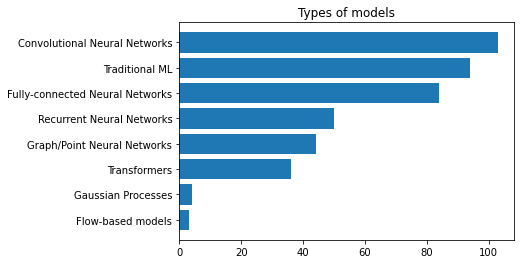

In [122]:
# Filter rare responses
model_counts = model_counts[model_counts > 1]

# Make the plot
fig, ax = plt.subplots()

ax.barh(model_counts.index, model_counts)
ax.set_title('Types of models');

## How long does (or would) it take to train your models on a single device?

In [137]:
data.columns[24]

'How long does (or would) it take to train your models on a single device?'

In [141]:
responses = data.iloc[:,24]
traintime = split_multi_response(responses)

In [141]:
time_counts = traintime.value_counts(ascending=True)
time_counts

No real idea yet. Marked probable cases for a single gpu                       1
Have not started yet. Need to learn first step. May take long time.            1
Haven't reached that stage yet :/                                              1
I have utilized more than 100 node-years of training time on HPC systems.      1
Years                                                                          1
Not sure yet                                                                   1
unknown                                                                        1
unsure- still in development                                                   1
Months                                                                        11
Weeks                                                                         23
Minutes                                                                       44
Days                                                                          68
Hours                       

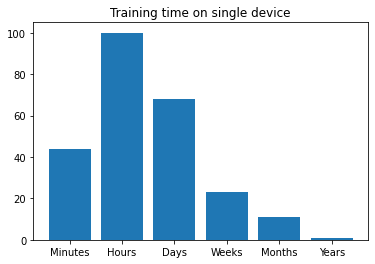

In [149]:
time_x = ['Minutes', 'Hours', 'Days', 'Weeks', 'Months', 'Years']
time_y = time_counts[time_x]

# Make the plot
fig, ax = plt.subplots()

ax.bar(time_x, time_y)
ax.set_title('Training time on single device');

## Do you use or plan to use distributed training?

In [150]:
data.columns[25]

'Do you use or plan to use distributed training?'

In [151]:
responses = data.iloc[:,25]
responses

0                                       Data parallelism
1      Data parallelism, Hybrid parallelism (combinat...
2                                                    NaN
3          Hybrid parallelism (combination of the above)
4      Data parallelism, Model parallelism, Pipeline ...
                             ...                        
169    I don't need distributed training (single node...
170                  Data parallelism, Model parallelism
171                  Data parallelism, Model parallelism
172        Hybrid parallelism (combination of the above)
173                                                  NaN
Name: Do you use or plan to use distributed training?, Length: 174, dtype: object

In [155]:
distmodes = split_multi_response(responses)

distmodes = distmodes.str.replace(
    'Hybrid parallelism (combination of the above)',
    'Hybrid parallelism', regex=False)
distmodes = distmodes.str.replace(
    "I don't need distributed training (single node or device is sufficient)",
    "Not needed", regex=False)

In [156]:
dist_counts = distmodes.value_counts(ascending=True)
dist_counts

We are not sure yet. Depends on further development                                                           1
Have not started yet. Need to start plan. Need help.                                                          1
Potentially some for of distributed training down the line                                                    1
but nothing current or in the near future.                                                                    1
Used MultiWorkerStrategy in TensorFlow once.                                                                  1
Not thought seriously about it yet                                                                            1
Very project dependent                                                                                        1
moving towards more parallelism                                                                               1
Data parallelism is something that we are considering to use downstream but we are not at that stage yet

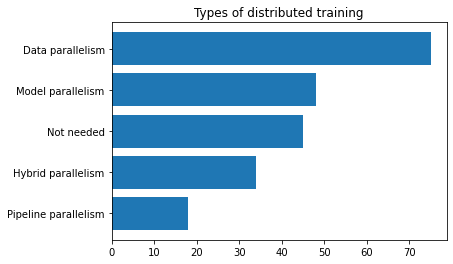

In [157]:
# Filter rare responses
dist_counts = dist_counts[dist_counts > 1]

# Make the plot
fig, ax = plt.subplots()

ax.barh(dist_counts.index, dist_counts)
ax.set_title('Types of distributed training');

## On how many devices do you typically train a model?

In [160]:
data.columns[27]

'On how many devices do you typically train a model?'

In [173]:
responses = data.iloc[:,27]
trainscale = split_multi_response(responses)
trainscale_counts = trainscale.value_counts(ascending=False)
trainscale_counts

Single    96
2-8       64
10s       28
100s      14
1000s      4
Name: On how many devices do you typically train a model?, dtype: int64

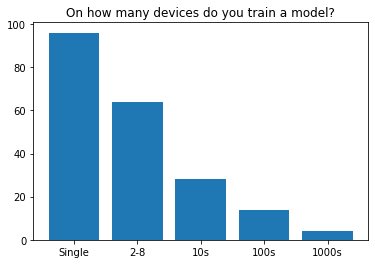

In [172]:
# Make the plot
fig, ax = plt.subplots()

ax.bar(trainscale_counts.index, trainscale_counts)
ax.set_title('On how many devices do you train a model?');

## What sizes are your training datasets?

In [176]:
data.columns[32]

'What sizes are your training datasets?'

In [177]:
responses = data.iloc[:,32]

In [178]:
responses

0         Up to 10 GB, 10s of GB
1                        1-10 TB
2                   1 GB or less
3            100s of GB, 1-10 TB
4      1 GB or less, Up to 10 GB
                 ...            
169                   100s of GB
170                          NaN
171                  Up to 10 GB
172                   100s of GB
173                          NaN
Name: What sizes are your training datasets?, Length: 174, dtype: object

In [179]:
datasizes = split_multi_response(responses)

In [180]:
datasizes

0       Up to 10 GB
0         10s of GB
1           1-10 TB
2      1 GB or less
3        100s of GB
           ...     
167    1 GB or less
168       10s of TB
169      100s of GB
171     Up to 10 GB
172      100s of GB
Name: What sizes are your training datasets?, Length: 276, dtype: object

In [181]:
datasize_counts = datasizes.value_counts()

In [183]:
datasize_counts.index

Index(['Up to 10 GB', '1 GB or less', '10s of GB', '100s of GB', '1-10 TB',
       '10s of TB', '>100 TB', 'No',
       'not yet. Not started. Most likely very small.',
       'Often online or self-training because of data volumes'],
      dtype='object')

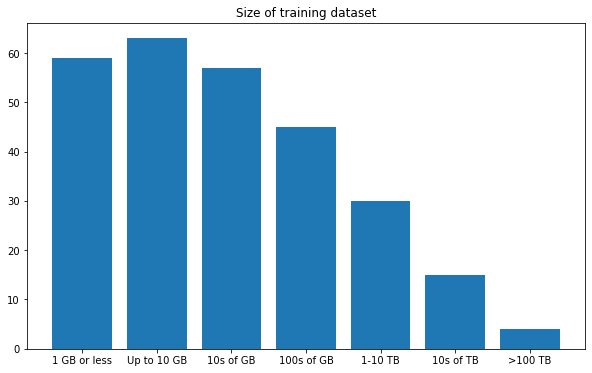

In [190]:
datasize_x = ['1 GB or less', 'Up to 10 GB', '10s of GB',
              '100s of GB', '1-10 TB', '10s of TB', '>100 TB']
datasize_y = datasize_counts[datasize_x]

# Make the plot
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(datasize_x, datasize_y)
ax.set_title('Size of training dataset');

## Investigating satisfaction with ML user support

In [198]:
data.columns[37]

"How satisfied are you with NERSC's ML user support (documentation, help tickets, training events)?"

In [213]:
responses = data.iloc[:,37].fillna(0).astype(int)

In [214]:
responses

0      7
1      7
2      0
3      5
4      5
      ..
169    3
170    0
171    0
172    6
173    0
Name: How satisfied are you with NERSC's ML user support (documentation, help tickets, training events)?, Length: 174, dtype: int64

In [215]:
x = data[responses == 4]

In [216]:
x

,Timestamp,How do you rate your expertise in Machine Learning?,What science domains are you using ML for?,Any publications that you would like to share with us,What frameworks/tools are you using?,What is your preferred environment for ML development?,Where do you run your ML models (include future plans)? [My own laptop or development box],Where do you run your ML models (include future plans)? [NERSC],Where do you run your ML models (include future plans)? [Other HPC center(s)],Where do you run your ML models (include future plans)? [University/Group cluster],...,How well does the ML software stack at NERSC satisfy your needs?,"How satisfied are you with NERSC's ML user support (documentation, help tickets, training events)?","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Installing/using software]","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Application performance]","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Getting interactive resources for development/testing]","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Submitting jobs]","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Getting jobs through the queues]",Are there any other aspects of running your ML workload at NERSC that you find challenging?,Do you have any other comments or suggestions to improve the suitability of NERSC resources for Machine Learning?,"Email (optional, so we can follow-up with you if relevant)"
27,5/13/2022 7:56:33,5.0,Earth and Environmental Science,https://www.mdpi.com/2073-4441/14/7/1032,scikit-learn,PyCharm IDE which allows for scripts/text edit...,"Training, Inference",Training,NaN,NaN,...,5.0,4.0,No challenge or concern,Somewhat challenging,Highly challenging,Somewhat challenging,No challenge or concern,Setting up environment on NERSC,NaN,NaN
29,5/13/2022 8:04:29,5.0,"Astrophysics, Medical",NaN,"TensorFlow 1, Keras, PyTorch",Notebooks (Jupyter or Colab),NaN,"Training, Inference",NaN,"Training, Inference",...,4.0,4.0,Somewhat challenging,Somewhat challenging,Somewhat challenging,Somewhat challenging,Highly challenging,NaN,NaN,NaN
30,5/13/2022 8:04:47,4.0,"Applied Mathematics, Computer Science, Enginee...",NaN,"PyTorch, scikit-learn, PyTorch Lightning",IDEs / text editors and scripts,Inference,"Training, Inference","Training, Inference","Training, Inference",...,4.0,4.0,Somewhat challenging,No challenge or concern,Somewhat challenging,No challenge or concern,No challenge or concern,NaN,NaN,NaN
38,5/13/2022 8:40:48,6.0,Biosciences,NaN,"scikit-learn, R",Notebooks (Jupyter or Colab),NaN,"Training, Inference",NaN,NaN,...,4.0,4.0,Somewhat challenging,No challenge or concern,No challenge or concern,No challenge or concern,Highly challenging,NaN,NaN,NaN
44,5/13/2022 9:13:35,3.0,Fusion Energy Science,NaN,"TensorFlow 2, PyTorch, scikit-learn",Notebooks (Jupyter or Colab),Inference,"Training, Inference",NaN,Training,...,4.0,4.0,Highly challenging,No challenge or concern,No challenge or concern,No challenge or concern,Somewhat challenging,"Getting up to speed initially was a challenge,...",A clear getting started tutorial would have be...,wallaceg@mit.edu
51,5/13/2022 9:58:18,5.0,Earth and Environmental Science,NaN,PyTorch,IDEs / text editors and scripts,"Training, Inference","Training, Inference","Training, Inference",NaN,...,4.0,4.0,No challenge or concern,No challenge or concern,No challenge or concern,No challenge or concern,No challenge or concern,NaN,move away from anaconda based python installs....,NaN
58,5/13/2022 10:19:00,6.0,"Astrophysics, High Energy Physics",NaN,"TensorFlow 2, Keras, PyTorch, sci

In [219]:
x.loc[60]

Timestamp                                                                                                                                                                                                                        5/13/2022 10:31:19
How do you rate your expertise in Machine Learning?                                                                                                                                                                                             5.0
What science domains are you using ML for?                                                                                                                                                                                     Biosciences, Medical
Any publications that you would like to share with us                                                                                                                                                                                           NaN
What frameworks/tools ar